In [1]:
#!pip install vaderSentiment 

In [2]:
# Dependencies
import tweepy
import os
import numpy as np
import pandas as pd

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Get the current working directory
orig_working_directory = os.getcwd()
print(orig_working_directory)

/Users/pariya/Desktop/pariya_GW_HW_Python_APIs/Twitter-API-Instructions


In [4]:
# get back up 2 level to be on Desktop first, then navigate to 'gwu-' directory which contains config.py inside
os.chdir(os.path.join('..','..','gwu-arl-data-pt-03-2020-u-c'))

# Now, you can see the new working directory
curr_working_directory = os.getcwd()
os.getcwd()

'/Users/pariya/Desktop/gwu-arl-data-pt-03-2020-u-c'

In [8]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [19]:
# Target Search Term ----- BBC, CBS, CNN, Fox, and New York times
target_terms = ("@BBC", "@CBS", "@CNN", "@Fox", "@New York times")

# List to hold results
tweets_list = []
search_term_list = []

In [20]:
# Loop through all target users
for target in target_terms:
    
    # Iterate through the ---first 100 tweets---
    for tweet in tweepy.Cursor(api.search, target, tweet_mode='extended').items(100):
        tweets_list.append(tweet)    
        search_term_list.append(target)

In [15]:
tweets_list[0]

Status(_api=<tweepy.api.API object at 0x11dbc2b90>, _json={'created_at': 'Sun May 17 08:51:03 +0000 2020', 'id': 1261942295902990336, 'id_str': '1261942295902990336', 'full_text': "RT @BBC: Join HRH The Duke of Cambridge as he aims to break the stigma around men's mental health.\n\n#FootballPrinceWilliamAndOurMentalHealt…", 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'BBC', 'name': 'BBC', 'id': 19701628, 'id_str': '19701628', 'indices': [3, 7]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 558060557, 'id_str': '558060557', 'name': 'Julia Paulina ♜☄️', 'screen_name': 'RoyalJulia', 'location': 'Italy',

In [22]:
user_list = []
tweet_text_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through all tweets
for tweet in tweets_list:
    
        # Run Vader Analysis on each tweet
        tweet_user = tweet.user.screen_name 
        tweet_text = tweet.full_text 
        
        #Run sentiments analysis using --tweet.full_text--
        results = analyzer.polarity_scores(tweet_text)
        com = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the appropriate list created above
        user_list.append(tweet_user)
        tweet_text_list.append(tweet_text)
        compound_list.append(com)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [24]:
result_df = pd.DataFrame({
    'User': user_list,
    'Search Term': search_term_list,
    'Tweet Text': tweet_text_list,
    'Compound': compound_list,
    'Positive': positive_list,
    'Negative': negative_list,
    'Neutral': neutral_list,
})

pd.set_option('display.max_colwidth', -1)

result_df

/Users/pariya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


,User,Search Term,Tweet Text,Compound,Positive,Negative,Neutral
0,yhdenpojanaiti,@BBC,#hakekaakätilö @CallTheMidwife1 @BBC @Yleisradio #NurseCrane I want to be like her💕👍🏻 https://t.co/TF0LVfLgOI,0.4215,0.183,0.000,0.817
1,owlhous,@BBC,RT @Antonineone1: #Marr\nIs the @BBC 'shielding' us from bad news?\nOr is it wrapping the government in its protective arms?\n#KeepTheLockdown…,-0.5940,0.000,0.155,0.845
2,brenpage72,@BBC,RT @Antonineone1: #Marr\nIs the @BBC 'shielding' us from bad news?\nOr is it wrapping the government in its protective arms?\n#KeepTheLockdown,-0.5940,0.000,0.155,0.845
3,Patrick49920857,@BBC,RT @aRTHUr98798756: @AndrewMarr9 and @BBC \n'on message' #widenschoolopening #statepropaganda\neffing disgrace that we pay a licence fee for…,-0.5984,0.000,0.234,0.766
4,ArchenBaloch,@BBC,العثور على سفير الصين في إسرائيل ميتا في منزله بتل أبيب https://t.co/o2TEHWCNC4 via @BBC,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...
398,Una_Alta_Volta,@Fox,"FIRST AN ALTERCATION WITH MR.NAVARRO&amp;NOW THIS💔😡\nNo wonder ppl are deserting @fox and viewing @newsmax or @AONN -WOW! FOX News Douche Leland Vittert Runs Disgusting Hit Piece on Michael Flynn -- Accuses Him of Being Liar, Omits ALL OF THE FACTS (VIDEO) https://t.co/d07BfZnJfp",-0.9039,0.073,0.285,0.643
399,NoFanofDFTfans,@Fox,@fox. Why do you have so many uneducated entertainers on your stations instead of true fact reporters? https://t.co/VcopWwmGZ5,0.6204,0.240,0.000,0.760
400,grancys2goldens,@New York times,"@New York Times news , what would Joseph Pulitzer think of your award ? Excellence in newspaper journalism .",0.8225,0.309,0.000,0.691
401,buzzardb5,@New York times,@dbongino @seanhannity @IngrahamAngle @JesseBWatters @TuckerCarlson @CNNPolitics @new York times@wsj@pelosi @shitty shciff can you explain to me why Democrats don’t want us at the poles but it’s ok for the huge lines at Walmart Costco Home Depot and Lowe’s this needs to seen,0.5574,0.146,0.049,0.805


In [79]:
#result_df_group = result_df.groupby('Search Term')
#summary = result_df_group['Compound','Positive','Neutral','Negative'].
#summary



/Users/pariya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [49]:
import numpy as np
import matplotlib.pyplot as plt

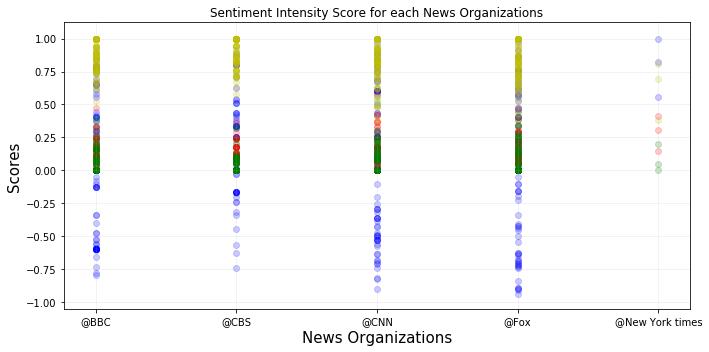

In [90]:
# Scatter Plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(result_df['Search Term'], result_df['Compound'], color="b", alpha=0.2)
ax.scatter(result_df['Search Term'], result_df['Positive'], color="r", alpha=0.2)
ax.scatter(result_df['Search Term'], result_df['Negative'], color="g", alpha=0.2)
ax.scatter(result_df['Search Term'], result_df['Neutral'], color="y", alpha=0.2)



ax.set_xlabel('News Organizations', fontsize=15)
ax.set_ylabel('Scores', fontsize=15)
ax.set_title('Sentiment Intensity Score for each News Organizations')

ax.grid(alpha=.2)
fig.tight_layout()

plt.show()